# Seaborn: FacetGrid

In [1]:
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Intro Visuals

In [36]:
from matplotlib import pyplot as plt

In [37]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=14)    

In [61]:
sns.set_style('white')

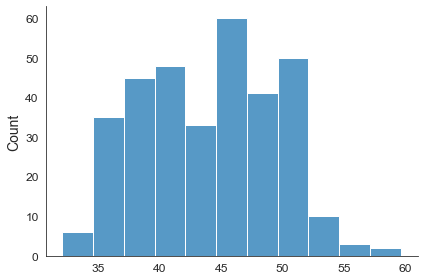

In [43]:
sns.histplot(penguins.culmen_length_mm)
sns.despine()
plt.xlabel('')
plt.tight_layout()
plt.savefig('15histplot_histogram_example.png', dpi=200);

In [62]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)  

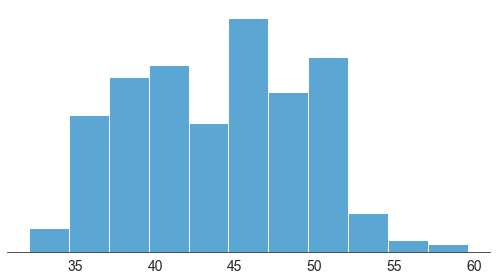

In [65]:
plt.figure(figsize=(7,4))
sns.histplot(penguins.culmen_length_mm, alpha=1, color='#5ca6d3')
sns.despine(left=True)
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.savefig('15histplot_histogram_thumb.png', dpi=200);

In [57]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10)  

## Basics

In [4]:
sns.set_style('white')

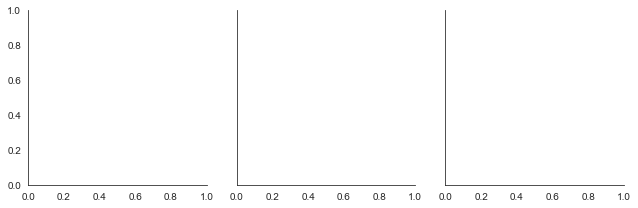

In [6]:
g = sns.FacetGrid(penguins, col='island');  #first without islands

In [7]:
type(g)

seaborn.axisgrid.FacetGrid

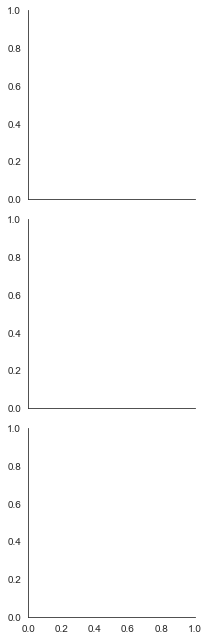

In [8]:
g = sns.FacetGrid(penguins, row='island');  #col='island' first

### `.map()`

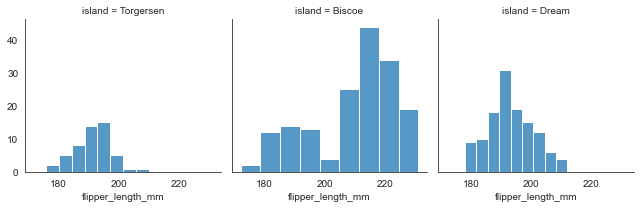

In [9]:
g = sns.FacetGrid(penguins, col='island')
g.map(sns.histplot, 'flipper_length_mm');

### `.map_dataframe()`

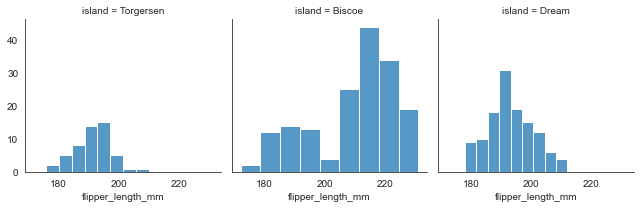

In [10]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.histplot, 'flipper_length_mm'); #then put x=, show how this errors out above

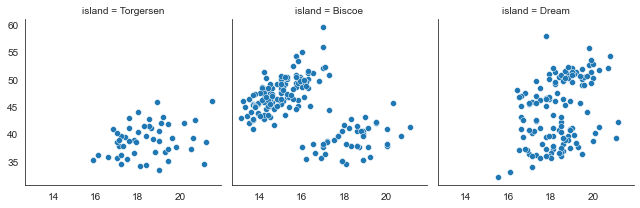

In [12]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm');

## Methods and Attributes

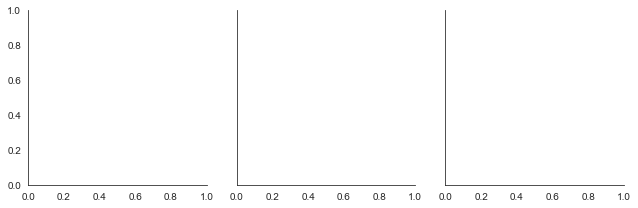

In [13]:
g = sns.FacetGrid(penguins, col='island');

In [14]:
type(g)

seaborn.axisgrid.FacetGrid

In [ ]:
g.  #TAB

### `.set_axis_labels()`

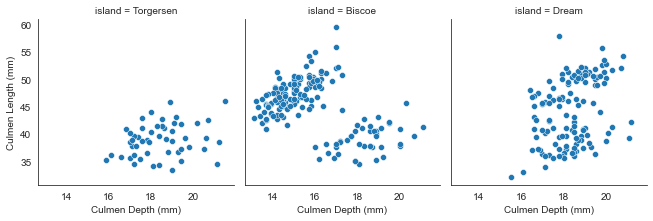

In [16]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm')
g.set_axis_labels('Culmen Depth (mm)', 'Culmen Length (mm)');

### `.set_titles()`

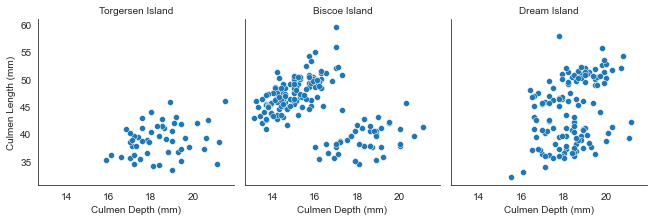

In [22]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm')
g.set_axis_labels('Culmen Depth (mm)', 'Culmen Length (mm)')
g.set_titles(col_template='{col_name} Island');

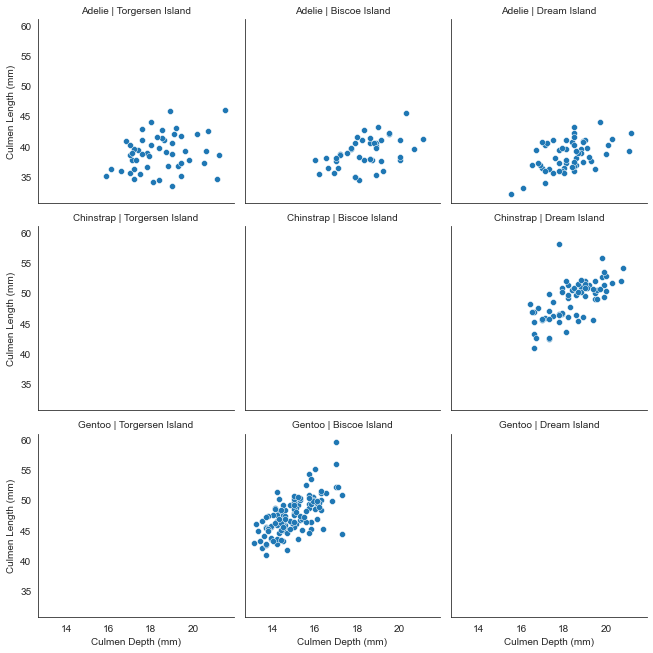

In [20]:
g = sns.FacetGrid(penguins, col='island', row='species')
g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm')
g.set_axis_labels('Culmen Depth (mm)', 'Culmen Length (mm)')
g.set_titles(col_template='{col_name} Island', row_template='{row_name}');

### `sharey, ylim`

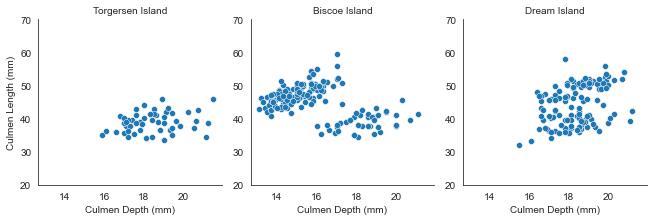

In [28]:
g = sns.FacetGrid(penguins, col='island', sharey=False, ylim=(20, 70))  #add sharey, ylim

g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm')
g.set_axis_labels('Culmen Depth (mm)', 'Culmen Length (mm)')
g.set_titles(col_template='{col_name} Island');

## Hue and Custom Functions

### `hue`

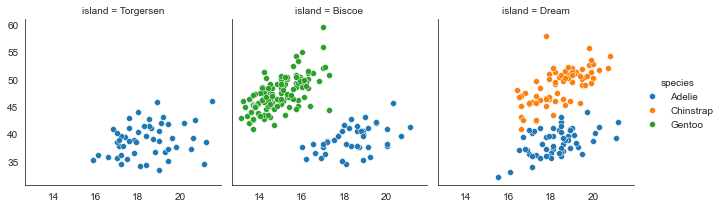

In [35]:
g = sns.FacetGrid(penguins, col='island', hue='species')
g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm') #show how hue here is a mistake
g.add_legend();

### `palette`

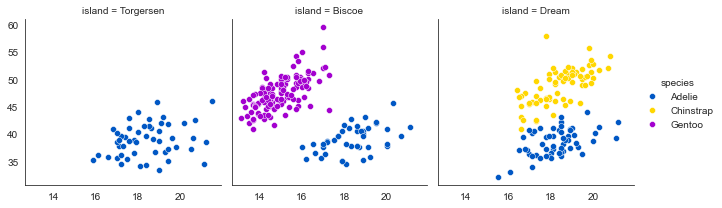

In [68]:
g = sns.FacetGrid(penguins, col='island', hue='species', palette='prism')
g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm') 
g.add_legend();

### Custom Functions

In [185]:
import matplotlib.pyplot as plt
import numpy as np

def add_mean_line(data, var=None, **kws):
    
    #Calculate mean for each group
    m = np.mean(data[var])
    
    #Get current axis
    ax = plt.gca()
    
    #add line at group mean
    ax.axvline(m, color='maroon', lw=3, ls='--')
    
    #annotate group mean
    x_pos=0.65
    if m > 5000: x_pos=0.2
    ax.text(x_pos, 0.7, f'mean={m:.0f}', 
            transform=ax.transAxes,   #transforms positions to range from (0,0) to (1,1)
            color='maroon', fontweight='bold', fontsize=12)

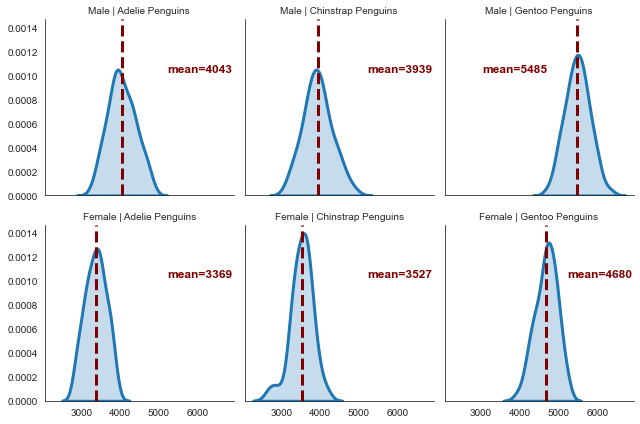

In [200]:
var='body_mass_g'

g = sns.FacetGrid(penguins, col='species', row='sex')
g.map_dataframe(sns.kdeplot, var, lw=3, shade=True) 
g.map_dataframe(add_mean_line, var=var)  #Add this line
g.set_titles(row_template='{row_name}', col_template='{col_name} Penguins');